# Data Description

Data consist of two files:

train_csv.csv: The training dataset consists of 80 observation with observation id, timestamp and feature value.

test_csv.csv:The next 40 observation along with observation id and timestamp are present here. You'll have to predict the value of feature at these timestamps.

value to predict: The value of feature attribute has to be predicted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Procedure 

In [2]:
# Reading the input files :

X = pd.read_csv('train.csv')
X.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [3]:
X.shape
print('Shape of data is :', X.shape)

('Shape of data is :', (80, 3))


In [4]:
X.dtypes

id           int64
time        object
feature    float64
dtype: object

In [5]:
X.isnull().sum()

id         0
time       0
feature    0
dtype: int64

In [6]:
# convert datatype of 'X['time'] :
import datetime
X['time']= pd.to_datetime(X['time']) 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null datetime64[ns]
feature    80 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.9 KB


In [7]:
X.describe()

,id,feature
count,80.0000,80.000000
mean,39.5000,147.496375
std,23.2379,96.846260
min,0.0000,21.360000
25%,19.7500,66.730000
50%,39.5000,125.240000
75%,59.2500,199.820000
max,79.0000,469.720000


In [8]:
X=X.drop(columns='id',axis=1)
X.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [9]:
X = X.set_index('time')
X.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


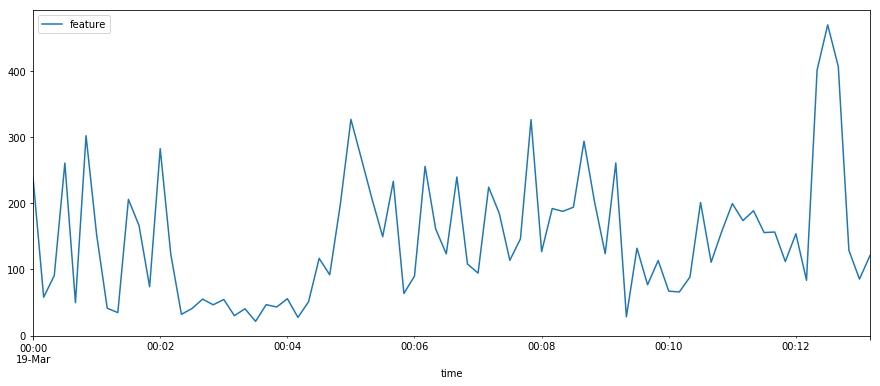

In [10]:
# Check the distribution of target variable 'feature' in train data : 
X.plot(figsize=(15, 6))
plt.show()

# Need to decompose the data to analyse more accurately on Trend,Seasonality & Noise.

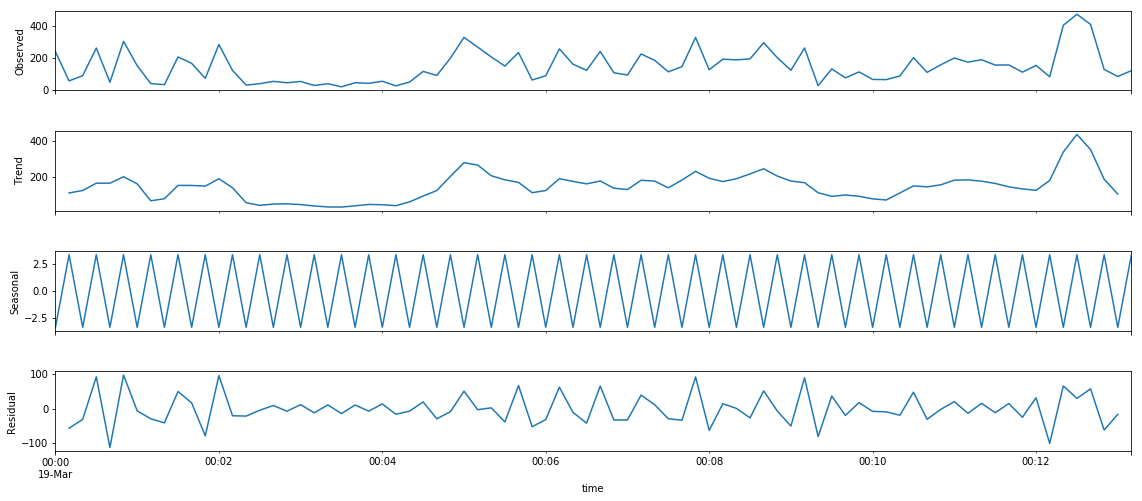

In [11]:
# DECOMPOSING TIME SERIES DATA: 

from statsmodels.tsa.seasonal import seasonal_decompose
season = seasonal_decompose(X,model='additive', freq=2)
fig = season.plot();
fig.set_size_inches(18,8)

# There seems to be some upward trend & seasonality.

In [12]:
# Testing for stationarity of time series :
# ADF(augmented dicky fuller test) test
# H0 = "Data is non stationary."
# Ha = "Data is stationary."


from statsmodels.tsa.stattools import adfuller
val = X['feature'].values
result = adfuller(val)
print('ADF statistic :',result[0])
print('p-value is :' ,result[1])
result

# By p value & ADF statistic value, we reject the null hypothesis & conclude that the given time series data is stationary.


('ADF statistic :', -5.945866499650215)
('p-value is :', 2.205049473411699e-07)


(-5.945866499650215,
 2.205049473411699e-07,
 0,
 79,
 {'1%': -3.5159766913976376,
  '10%': -2.5866935058484217,
  '5%': -2.898885703483903},
 786.8263144737514)

C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


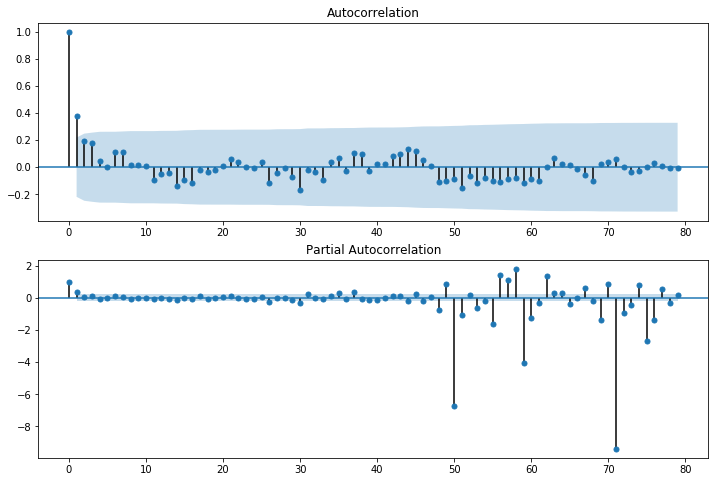

In [13]:
# ACF & PACF plot :

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X,ax=ax2)

# By the plots, we could consider p = 1, d = 0, q = 1

C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


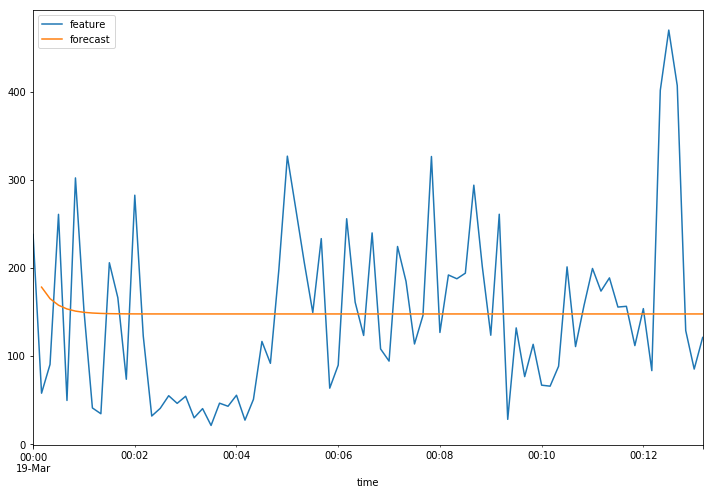

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(X,order=(1,0,1))
model_fit = model.fit()
X['forecast'] = model_fit.predict(start=1,end=80,dynamic=True)
X[['feature','forecast']].plot(figsize=(12,8))

# Due to presence of seasonality, arima model wouldnt be able to forecast accurately.
# Therefore using seasonal ARIMA for further analysis

In [15]:
# SARIMAX :

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[1], x[0], x[1], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (1, 0, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [16]:
# parameter Selection that yields the best performance for our model :

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X['feature'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 yields the lowest AIC value of 657.65. Therefore we should consider this to be optimal option.           

C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred f

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1042.40353725
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1042.40353725
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:834.004862649


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:834.004862649
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:848.467942063
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:848.467942063


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:682.884902606


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:682.884902606


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:988.174001383
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:988.174001383


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:816.393424769


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:816.393424769
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:827.602753142
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:827.602753142


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:664.534702224


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:664.534702224
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:951.545169962
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:951.545169962


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:795.131125325
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:795.131125325


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:842.97485097
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:842.97485097


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:679.955383065


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:679.955383065
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:922.927037003


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:922.927037003


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:775.907500255


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:775.907500255
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:816.680922394
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:816.680922394


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:658.475532512


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:658.475532512
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:959.092266349
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:959.092266349


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:804.323761369


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:804.323761369
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:835.244537589
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:835.244537589


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:674.043855174


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:674.043855174
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:936.00914694
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:936.00914694


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:788.924298896


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:788.924298896
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:823.741183219


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:823.741183219


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:664.216720794


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:664.216720794
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:943.324376306
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:943.324376306


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:793.191920509


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:793.191920509
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:834.31086004
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:834.31086004


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:674.598851686


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:674.598851686
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:920.043719527


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:920.043719527


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:772.284155141


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:772.284155141


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:816.263864186


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:816.263864186


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:657.651231779


C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:657.651231778


In [17]:
# Choosing ARIMA(1, 1, 1)x(1, 1, 1, 12)12 :

mod = sm.tsa.statespace.SARIMAX(X['feature'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\Shanthi Mahesh\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3942      0.138      2.849      0.004       0.123       0.665
ma.L1         -1.0000    312.771     -0.003      0.997    -614.020     612.020
ar.S.L12      -0.2223      0.324     -0.686      0.492      -0.857       0.413
ma.S.L12      -0.4031      0.320     -1.260      0.208      -1.030       0.224
sigma2      1.083e+04   3.39e+06      0.003      0.997   -6.63e+06    6.65e+06


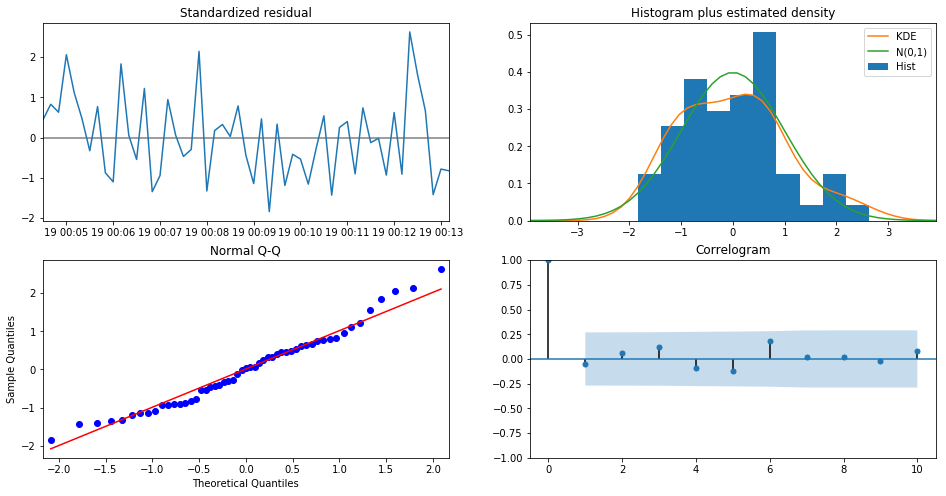

In [18]:
# model diagnostics : 

results.plot_diagnostics(figsize=(16, 8))
plt.show()

# It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

In [20]:
# Validating forecasts : 

# To understand the accuracy of forecasts, we compare predicted to real output of the time series, and we set forecasts to start at 2019-03-19 00:10:00 to the end of the data.

pred = results.get_prediction(start=pd.to_datetime('2019-03-19 00:10:00'), dynamic=False)
pred_ci = pred.conf_int()

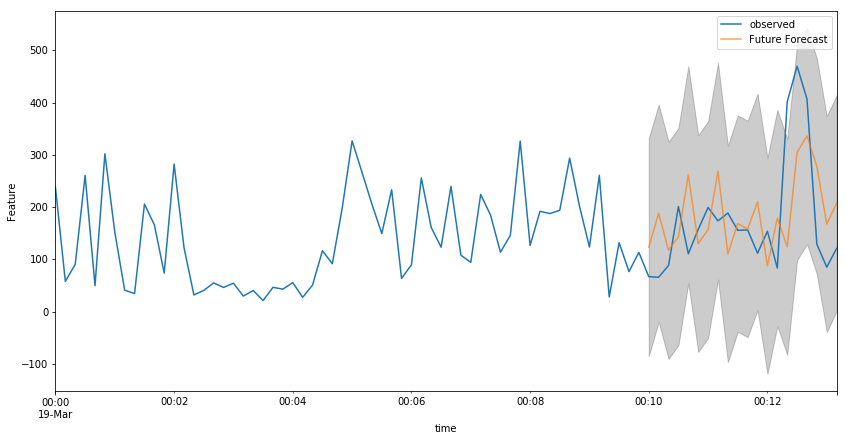

In [21]:
# Visualizing the forecast : 

ax = X['feature'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Future Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('time')
ax.set_ylabel('Feature')
plt.legend()

plt.show()

In [22]:
# Finding the line of best fit : RMSE

y_forecasted = pred.predicted_mean
y_truth = X['feature']['2019-03-19 00:10:00':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 11583.35
The Root Mean Squared Error of our forecasts is 107.63


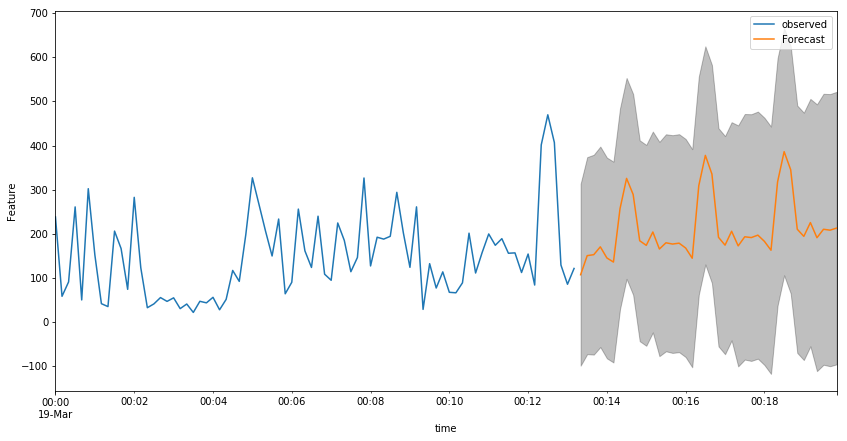

In [23]:
# Producing & visualizing forecast

pred_uc = results.get_forecast(steps=40)
pred_ci = pred_uc.conf_int()

ax = X['feature'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('time')
ax.set_ylabel('Feature')

plt.legend()
plt.show()

In [24]:
# Lets view the predicted output :

pred_uc.predicted_mean

2019-03-19 00:13:20    106.877079
2019-03-19 00:13:30    150.195747
2019-03-19 00:13:40    152.372116
2019-03-19 00:13:50    170.157165
2019-03-19 00:14:00    144.927626
2019-03-19 00:14:10    135.637582
2019-03-19 00:14:20    256.664421
2019-03-19 00:14:30    325.457715
2019-03-19 00:14:40    289.009692
2019-03-19 00:14:50    183.962479
2019-03-19 00:15:00    173.534823
2019-03-19 00:15:10    203.837501
2019-03-19 00:15:20    165.223114
2019-03-19 00:15:30    179.390516
2019-03-19 00:15:40    176.474323
2019-03-19 00:15:50    178.509115
2019-03-19 00:16:00    167.465184
2019-03-19 00:16:10    144.311559
2019-03-19 00:16:20    309.001597
2019-03-19 00:16:30    377.637364
2019-03-19 00:16:40    335.283126
2019-03-19 00:16:50    191.799676
2019-03-19 00:17:00    173.986728
2019-03-19 00:17:10    205.519522
2019-03-19 00:17:20    172.323664
2019-03-19 00:17:30    192.972642
2019-03-19 00:17:40    191.188706
2019-03-19 00:17:50    196.725522
2019-03-19 00:18:00    182.527428
2019-03-19 00:

In [25]:
# Converting y_pred to a dataframe which is an array

ytest = pd.DataFrame(pred_uc.predicted_mean)
#Reset Index
ytest = ytest.reset_index(drop=True)
ytest

,0
0,106.877079
1,150.195747
2,152.372116
3,170.157165
4,144.927626
5,135.637582
6,256.664421
7,325.457715
8,289.009692
9,183.962479


In [26]:
# Read test file :

y = pd.read_csv('test.csv')

#Converting time object to datetime

y['time']= pd.to_datetime(y['time']) 
y.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [27]:
#Adding two Dataframes

test_pred = pd.concat([y, ytest], axis=1)
test_pred.head()

,id,time,0
0,80,2019-03-19 00:13:20,106.877079
1,81,2019-03-19 00:13:30,150.195747
2,82,2019-03-19 00:13:40,152.372116
3,83,2019-03-19 00:13:50,170.157165
4,84,2019-03-19 00:14:00,144.927626


In [28]:
test_pred['feature'] = test_pred[0]
test_pred=test_pred.drop(columns = ['time',0],axis = 1)
test_pred.head()

,id,feature
0,80,106.877079
1,81,150.195747
2,82,152.372116
3,83,170.157165
4,84,144.927626


In [29]:
#Final Solution file
test_pred.to_csv('solution.csv',index = False)